<a href="https://colab.research.google.com/github/FaiazS/Word_Embeddings_And_Positional_Encodings_Demo/blob/main/Positional_Encoding_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

In [52]:
#Defining meaningful words and word categories

word_categories = {

                   "Programming Language":["Python", "Ruby", "JavaScript", "Kotlin", "Java"],

                   "Data Structures":["Arrays" ,"LinkedLists", "HashMap" ,"Trees", "Graphs"],

                   "Algorithms":["Binary Search", "Merge Sort", "Sliding Window", "Two Pointers", "BFS", "DFS", "Toplogical Sort", "Dijkstra's Algorithm"]

}

word_embeddings ={}

In [53]:
#Generating Cluster-based word embeddings

for category, words in word_categories.items():

  cluster_center = np.random.rand(128) # Each Category has a central vector

  for word in words:

    word_embeddings[word] = cluster_center + np.random.normal(0, 0.3, 128) # Adding some variations

In [54]:
#Generating positional encodings

def generate_positional_encodings(sequence_length, embedding_dimension):

  positional_encoding = np.zeros((sequence_length, embedding_dimension))

  for position in range(sequence_length):

    for i in range(0, embedding_dimension, 2):

      positional_encoding[position, i] = np.sin(position / (10000 ** ((2 * i) / embedding_dimension)))

      if i + 1 < embedding_dimension:

        positional_encoding[position, i + 1] = np.cos(position / (10000 ** ((2 * i) / embedding_dimension)))


        return positional_encoding

In [55]:
#Adding positional_encodings to word embeddings

sequence_length = len(word_embeddings)

embedding_dimension = 128

positional_encodings = generate_positional_encodings(sequence_length, embedding_dimension)

words = list(word_embeddings.keys())

combined_embeddings = {}

for i, word in enumerate(words):

  combined_embeddings[word] =  word_embeddings[word] + positional_encodings[i]  #Adding the word position information.

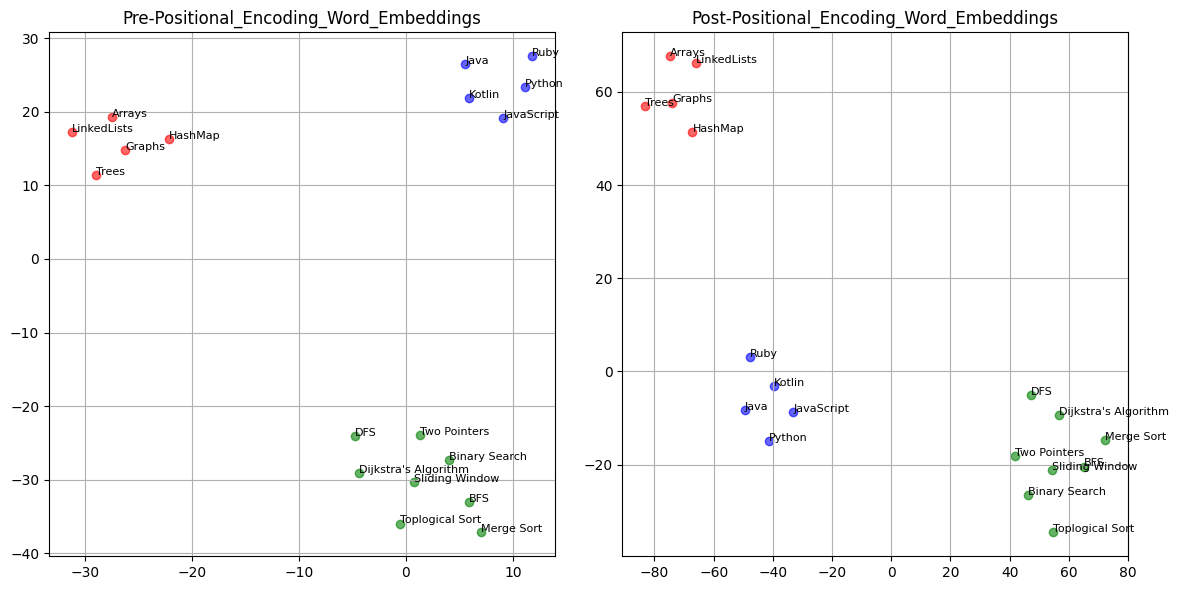

In [56]:
#Visualisation Function(t - SNE)

def plot_embeddings_side_by_side(embeddings1, title1, embeddings2, title2, word_categories):

  words1 = list(embeddings1.keys())

  wordsvector1 = np.array(list(embeddings1.values()))

  words2 = list(embeddings2.keys())

  wordsvector2 = np.array(list(embeddings2.values()))

  tsne = TSNE(n_components = 2, perplexity = 5, random_state = 42)

  reduced_wordvector1 = tsne.fit_transform(wordsvector1)

  reduced_wordvector2 = tsne.fit_transform(wordsvector2)

  figure, axes = plt.subplots(1, 2, figsize =(12, 6))

  word_category_colors = {

                          "Programming Language":"Blue",
                          "Data Structures":"Red",
                          "Algorithms":"Green",

  }

#Plotting Original Word Embeddings

  for word in words1:

    word_category = next((key for key, value in word_categories.items() if word in value), None)

    category_color = word_category_colors[word_category]

    word_index = words1.index(word)

    axes[0].scatter(reduced_wordvector1[word_index, 0], reduced_wordvector1[word_index, 1], color = category_color, alpha = 0.6)

    axes[0].text(reduced_wordvector1[word_index, 0], reduced_wordvector1[word_index, 1] + 0.02, word, fontsize = 8)

  axes[0].set_title(title1)

  axes[0].grid()


#Plotting Word Embeddings post Positional Encoding

  for word in words2:

     word_category = next(key for key, value in word_categories.items() if word in value)

     if word_category is None:

      continue

     category_color = word_category_colors.get(word_category, 'black')

     word_index = words2.index(word)

     axes[1].scatter(reduced_wordvector2[word_index,0], reduced_wordvector2[word_index, 1], color = category_color, alpha = 0.6)

     axes[1].text(reduced_wordvector2[word_index, 0], reduced_wordvector2[word_index, 1] + 0.02, word, fontsize = 8)

  axes[1].set_title(title2)

  axes[1].grid()

  plt.tight_layout()

  plt.show()


#Plotting Side by Side: Both Original Word Embeddings and with Positional Encodings added

plot_embeddings_side_by_side(word_embeddings, "Pre-Positional_Encoding_Word_Embeddings", combined_embeddings, "Post-Positional_Encoding_Word_Embeddings", word_categories)